In [9]:
import networkx as nx


def initialize_single_source(G, s):
    """
    Initialize the distance and predecessor attributes of all vertices in a graph G
    to infinity and None respectively, except for the source vertex s which should
    have a distance of 0.
    """
    # Initialize the distance and predecessor attributes of all vertices
    for v in G.nodes:
        G.nodes[v]['distance'] = np.inf
        G.nodes[v]['predecessor'] = None
    # Set the distance of the source vertex to 0
    G.nodes[s]['distance'] = 0


def relax(G, u, v, w):
    """
    Relax an edge (u, v) in a weighted graph G using the weight function w.
    """
    # If the distance to the destination vertex can be reduced by relaxing
    # the edge, then update the distance and predecessor attributes of the
    # destination vertex
    if G.nodes[v]['distance'] > G.nodes[u]['distance'] + w[(u, v)]:
        G.nodes[v]['distance'] = G.nodes[u]['distance'] + w[(u, v)]
        G.nodes[v]['predecessor'] = u


def dijkstra(G, s, w):
    """
    Find the shortest path from a source vertex s to all other vertices in a weighted
    graph G using Dijkstra's algorithm.
    """
    # Initialize the distance and predecessor attributes of all vertices
    initialize_single_source(G, s)
    # Initialize the set of vertices whose final shortest path weights are known
    S = set()
    # Initialize the priority queue Q to contain all vertices in G
    Q = set(G.nodes)
    # While there are still vertices whose final shortest path weights are unknown
    while Q:
        # Find the vertex in Q with the smallest distance to s
        u = min(Q, key=lambda x: G.nodes[x]['distance'])
        # Add the vertex to S
        S.add(u)
        # Remove the vertex from Q
        Q.remove(u)
        # For each vertex v adjacent to u
        for v in G.neighbors(u):
            # Relax the edge (u, v)
            relax(G, u, v, w)

Shortest path from 's' to 'z': ['s', 'y', 'z']
Distance: 7


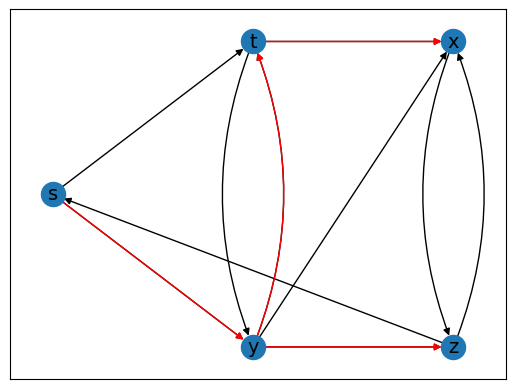

In [11]:
# Create graph from Cormen figure 22.6
G = nx.MultiDiGraph()

G.add_nodes_from(['s', 't', 'x', 'y', 'z'])

G.add_weighted_edges_from([('s', 't', 10), ('s', 'y', 5),
                            ('t', 'x', 1), ('t', 'y', 2),
                            ('x', 'z', 4),
                            ('y', 't', 3), ('y', 'x', 9), ('y', 'z', 2),
                            ('z', 's', 7), ('z', 'x', 6)])

w = nx.get_edge_attributes(G, 'weight')
w = {(u, v): w[(u, v, s)] for (u, v, s) in w}

# Run Dijkstra's algorithm on the graph
dijkstra(G, 's', w)

# Print the shortest path from s to z
print(f"Shortest path from 's' to 'z': {nx.shortest_path(G, 's', 'z', weight='weight')}")

# Print the distance from s to z
print(f"Distance: {nx.shortest_path_length(G, 's', 'z', weight='weight')}")

# Draw the graph
pos = {
    's': (0, 1),
    't': (1, 2),
    'x': (2, 2),
    'y': (1, 0),
    'z': (2, 0)
}

# Draw nodes
nx.draw_networkx_nodes(G, pos)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Draw edges with curvature
for (u, v, key) in G.edges(keys=True):
    # Only draw the curved edge if there also exists an edge from v to u
    if (v, u, key) in G.edges(keys=True):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], connectionstyle=f'arc3,rad=0.2')
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], label=f"{w[(u, v)]}")

# Plot the shortest paths
for v in G.nodes:
    if G.nodes[v]['predecessor'] is not None:
        # Only draw the curved edge if there also exists an edge from v to u
        if (v, G.nodes[v]['predecessor'], 0) in G.edges(keys=True):
            nx.draw_networkx_edges(G, pos, edgelist=[(G.nodes[v]['predecessor'], v)], edge_color='r', connectionstyle=f'arc3,rad=0.2')
        else:
            nx.draw_networkx_edges(G, pos, edgelist=[(G.nodes[v]['predecessor'], v)], edge_color='r')